# Titanic: Machine Learning from Disaster

A Getting Started Prediction Competition From [kaggle](https://www.kaggle.com/c/titanic#evaluation)

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**This Notebook will show basic examples of:**
* Collecting the data
* Exploratory data analysis
* Feature engineering
* Feature selection
* Modelling
* Testing

## 1. Collecting the data

In [576]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 2. Exploratory data analysis

### Data Dictionary
The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead. This is the variable we're going to predict.

The other variables describe the passengers. They are the features.

1. PassengerId: and id given to each traveler on the boat
2. Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
3. The Name of the passeger
4. The Sex
5. The Age
6. SibSp: number of siblings and spouses traveling with the passenger
7. Parch: number of parents and children traveling with the passenger
8. The ticket number
9. The ticket Fare
10. The cabin number
11. The embarkation. This describe three possible areas of the Titanic from which the people embark. C = Cherbourg, Q = Queenstown, S = Southampton

In [577]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [578]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [579]:
train.shape

(891, 12)

In [580]:
test.shape

(418, 11)

In [581]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that **Age and Cabin** values are missing for many rows.

In [582]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [583]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [584]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Visualizing Data

In [585]:
# !pip3 install matplotlib
# !pip3 install seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Bar Chart for Categorial Features

In [586]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['1', '0']
    df.plot(kind='barh', stacked=True, figsize=(6,4), title="Who Survived? (1 = Survived, 0 = Died)")

#### Pclass

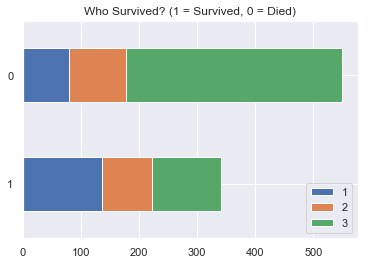

In [587]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

#### Sex

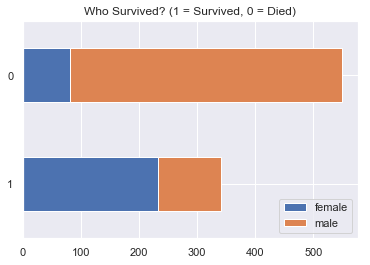

In [588]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

#### SibSp ( # of siblings and spouse)

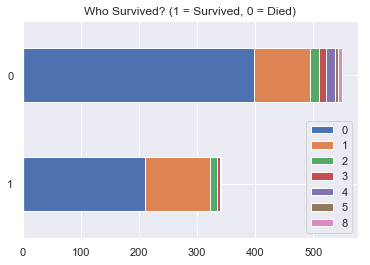

In [589]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

#### Parch ( # of parents and children)

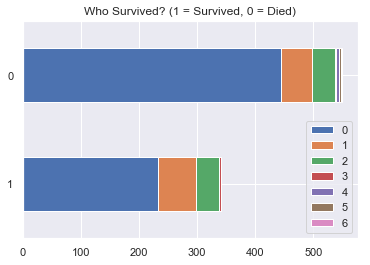

In [590]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

#### Embarked

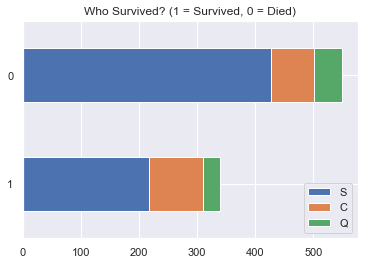

In [591]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 3. Feature engineering

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.
**The features (feature vectors) in your data will directly influence the predictive models you use and the results you can achieve.**



In [592]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 3.1 Name Feature
Let's first extract titles from Name column.

In [593]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [594]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Ms            1
Don           1
Lady          1
Countess      1
Jonkheer      1
Mme           1
Capt          1
Name: Title, dtype: int64

In [595]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

#### Title map
* Mr : 0
* Miss : 1
* Mrs: 2
* Others: 3

In [596]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [597]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [598]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


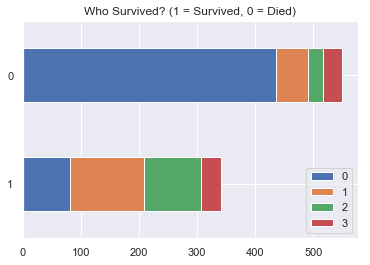

In [599]:
bar_chart('Title')

In [600]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [601]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### 3.2 Sex Feature
We convert the categorical value of Sex into numeric.
* male: 0 
* female: 1

In [602]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [603]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


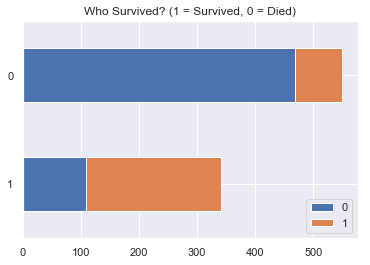

In [604]:
bar_chart('Sex')

### 3.3 Age Feature

#### 3.3.1 Handling Missing Data
Let's use Title's median age for meaning age<br>
<font color=red>(This can be improved...We can find the relevant feature to “Age”, then fill the missing data according to them)

In [605]:
# fill missing age with median age for each title(Mr, Mrs, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [606]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [607]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [608]:
# import numpy as np
# for dataset in train_test_data:
#     age_avg = dataset['Age'].mean()
#     age_std = dataset['Age'].std()
#     age_null_count = dataset['Age'].isnull().sum()
    
#     age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
#     dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
#     dataset['Age'] = dataset['Age'].astype(int)
    
# train['AgeBand'] = pd.cut(train['Age'], 6)

# print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

In [609]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


**age 0 to 18**

(0, 18)

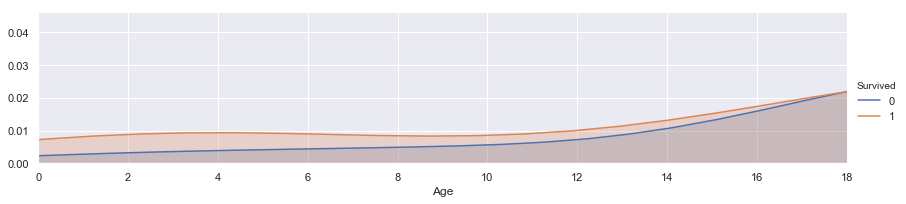

In [610]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(0, 18)

**age 18 to 40**

(18, 40)

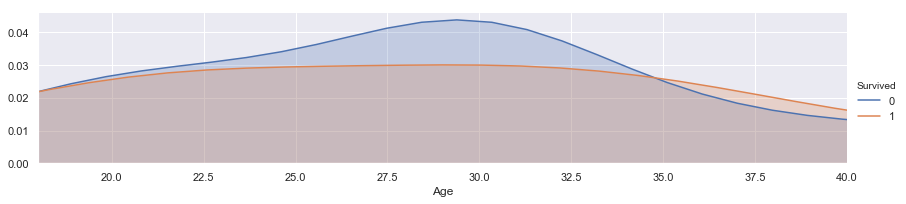

In [611]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(18, 40)

**age 40 to 60**

(40, 60)

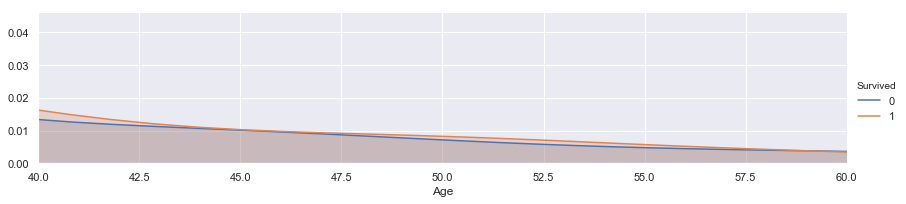

In [612]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(40, 60)

**age 60+**

(60, 100)

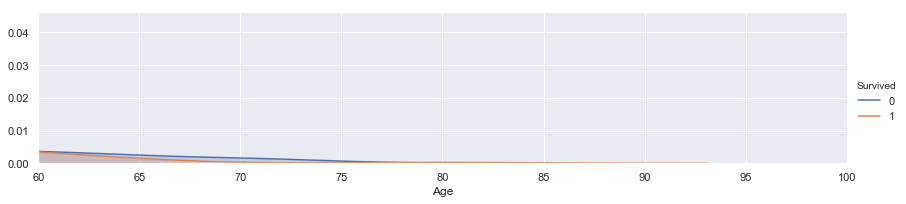

In [613]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(60, 100)

#### 3.3.2 Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
* child(0-18): 0   
* adult(18-40): 1  
* mid-age(40-60): 2  
* senior(60-80): 3

<font color=red>(How to do binning more smarter?)

In [614]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 18, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 40), 'Age'] = int(1),
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 2,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 3
    dataset['A'] = dataset['Age'].astype(int)

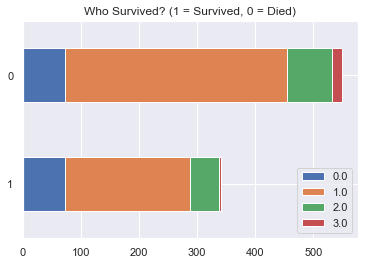

In [615]:
bar_chart('Age')

### 3.4 Embarked Feature

#### 3.4.1 Handling missing values

In [616]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We find that category "S" has maximum passengers. Hence, we replace "nan" values with "S".

In [617]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [618]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1,NaN,S,0
1,2,1,1,1,1.0,1,0,PC 17599,1,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,1,C123,S,2
4,5,0,3,0,1.0,0,0,373450,1,NaN,S,0


We now convert the categorical value of Embarked into numeric. We represent 0 as S, 1 as C and 2 as Q.

In [619]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [620]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1,NaN,0,0
1,2,1,1,1,1.0,1,0,PC 17599,1,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,1,C123,0,2
4,5,0,3,0,1.0,0,0,373450,1,NaN,0,0


### 3.5 Fare Feature
Replace missing Fare values with the median of Fare.

In [622]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [623]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1,NaN,0,0
1,2,1,1,1,1.0,1,0,PC 17599,1,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,1,C123,0,2
4,5,0,3,0,1.0,0,0,373450,1,NaN,0,0


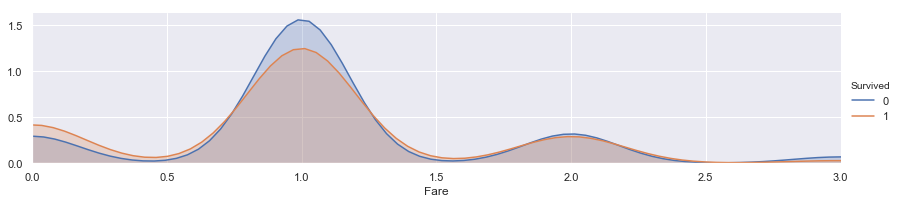

In [558]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

Create FareBand. We divide the Fare into 4 category range. 
Then map Fare according to FareBand.

In [570]:
train['FareBand'] = pd.qcut(train['Fare'], 3)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

KeyError: "['FareBand'] not in index"

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
train.head()

### 3.6 SibSp & Parch Feature
Combining SibSp & Parch feature, we create a new feature named FamilySize.

In [ ]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

About data shows that:

* Having FamilySize up to 4 (from 2 to 4) has better survival chance.
* FamilySize = 1, i.e. travelling alone has less survival chance.
* Large FamilySize (size of 5 and above) also have less survival chance.

## 4. Feature Selection

We drop unnecessary columns/features and keep only the useful ones for our experiment. Column PassengerId is only dropped from Train set because we need PassengerId in Test set while creating Submission file to Kaggle.

In [ ]:
features_drop = ['SibSp','Parch', 'Ticket', 'Cabin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'FareBand'], axis=1)

In [ ]:
train.head()

In [ ]:
test.head()